In [167]:
!pip install imblearn
!pip install -U statmodels
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement statmodels (from versions: none)
ERROR: No matching distribution found for statmodels


In [206]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [169]:
#Load dataset
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [170]:
# data dimension
df.shape

(1599, 12)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


there are no null value

In [172]:
# statistical data describtion
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [173]:
new_df = df.replace("medium", "high")
print(new_df.shape)
new_df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [174]:
#duplicate data checking
duplicate_status = new_df.duplicated()
duplicate_status

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [175]:
duplicate_status.sum()

240

there are 976 data duplicate

In [176]:
#handling duplicate
data = new_df.drop_duplicates()
data.shape

(1359, 12)

In [177]:
# skewness checking
data.skew(numeric_only = True)

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

pH, temperature, fat and colour cooumn > +- 0.5, imputated by median and the rest with mean

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


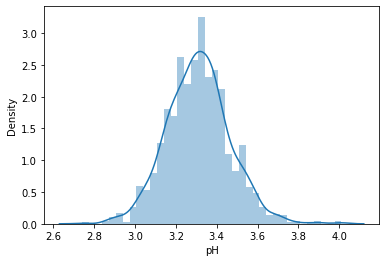

In [178]:
# distribution plot  of ph 
sns.distplot(data['pH'])
plt.show()


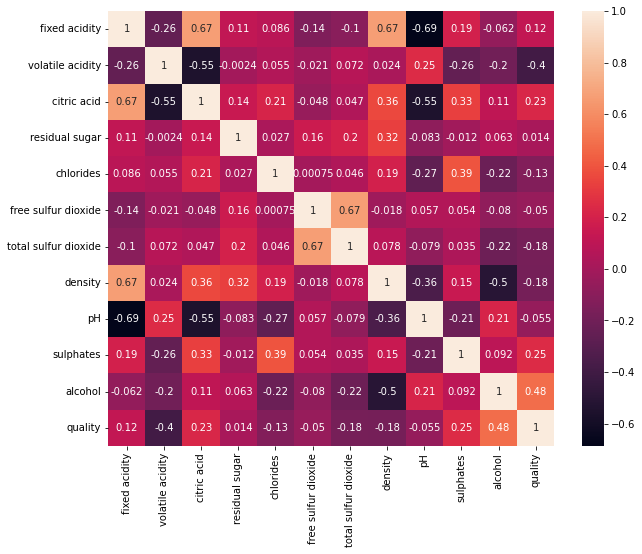

In [179]:
# pearson correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Turbidity and odor are correlated enough with correlation value of 0.38


In [180]:
# missing value checking
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [181]:
# data proportion for grade
plt.figure(figsize=(12,lt.xticks(rotation=45)
plt.show()

SyntaxError: invalid syntax (2645825952.py, line 3)

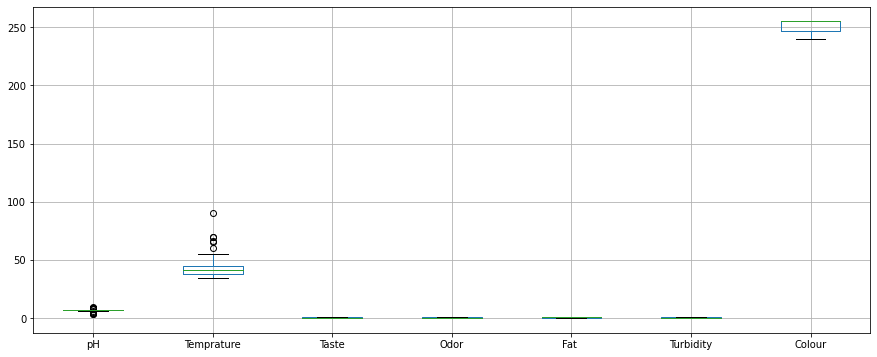

In [ ]:
# imbalance check
data.boxplot(figsize = (15,6))
plt.show()

In [ ]:
#labelling data
labelencoder = LabelEncoder()
new_data = data.copy()
new_data["Grade"] = labelencoder.fit_transform(new_data["Grade"])

new_data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,0


In [ ]:
new_data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade           int32
dtype: object

In [ ]:
# define x and y
x = new_data.drop(columns='Grade')
y = new_data['Grade']


In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE
sample = SMOTE(random_state=0)
x,y = sample.fit_resample(x,y)
y.value_counts()


0    57
1    57
Name: Grade, dtype: int64

In [ ]:
# train dan test data split
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
# Scaling untuk X_train dan X_test
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[ 0.14763233,  0.01883109,  1.15470054,  1.39121669,  0.90553851,
        -0.79056942, -1.46368289],
       [ 1.44915219,  1.0898493 , -0.8660254 , -0.71879529, -1.10431526,
         1.26491106,  0.76366064],
       [-2.94092011, -0.51667802,  1.15470054, -0.71879529, -1.10431526,
        -0.79056942,  0.76366064],
       [-0.01492306, -0.19537255,  1.15470054, -0.71879529,  0.90553851,
         1.26491106, -0.35001113],
       [ 1.61063086,  1.0898493 , -0.8660254 ,  1.39121669,  0.90553851,
         1.26491106,  0.76366064],
       [-0.01492306, -0.51667802,  1.15470054, -0.71879529,  0.90553851,
         1.26491106,  0.76366064],
       [-0.09620075, -0.73088166,  1.15470054, -0.71879529, -1.10431526,
        -0.79056942,  0.76366064],
       [ 1.52935317,  2.69637662, -0.8660254 , -0.71879529, -1.10431526,
        -0.79056942, -1.24094854],
       [-0.82770002,  0.5543402 , -0.8660254 ,  1.39121669,  0.90553851,
         1.26491106,  0.76366064],
       [ 0.06635464, -0.7308

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
y_pred = lgr.predict(x_test)


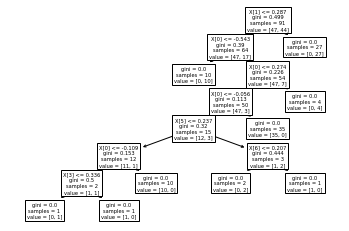

In [208]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
tree.plot_tree(classifier)

y_pred = classifier.predict(x_test)

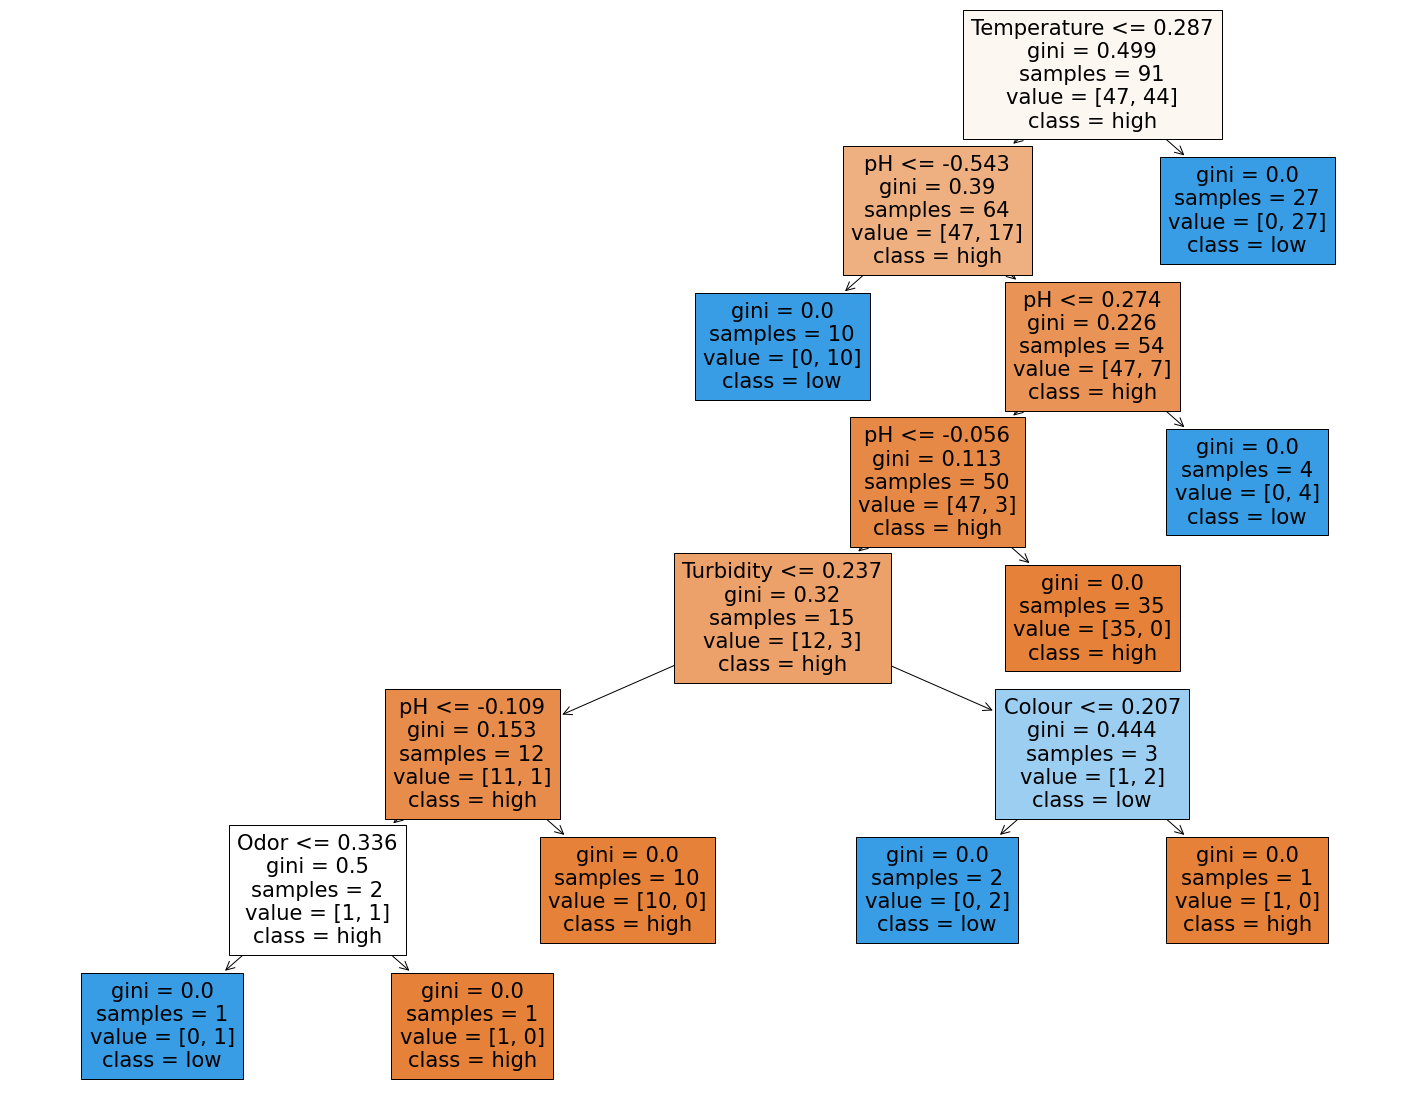

In [209]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=feature_names,  
                   class_names=label_names,
                   filled=True)

In [ ]:
#logistic regression performance checking
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 9  1]
 [ 2 11]]
0.8695652173913043
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.92      0.85      0.88        13

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



In [192]:
#cross validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lgr,x,y,cv=5)
print(cvs)
print(cvs.mean())


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.82608696 0.86956522 0.7826087  0.7826087  0.77272727]
0.8067193675889328


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# feature analysis
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=1)
variance.fit_transform(new_data)
print(variance.get_support())
print(new_data.columns)



[False  True False False False False  True False]
Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [ ]:
# feature selection using Chi-squared method
from sklearn.feature_selection import chi2, SelectKBest,SelectPercentile, f_classif
chi_best_col = SelectKBest(chi2,k=5)
kbest = chi_best_col.fit_transform(x,y)
print(np.array(new_data.drop(columns='Grade').columns)[chi_best_col.get_support()])
pd.DataFrame(list(zip(new_data.drop(columns='Grade').columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)


['Temprature' 'Taste' 'Odor' 'Fat ' 'Turbidity']


,features,scores
1,Temprature,68.030373
2,Taste,2.173913
3,Odor,1.000000
4,Fat,0.830508
5,Turbidity,0.555556
6,Colour,0.147218
0,pH,0.038309


Temprature', 'Odor', 'Fat ', 'Turbidity', and 'Taste' have more impact to the grade

In [ ]:
# feature selection using anova
f_best_col = SelectKBest(f_classif,k=5)
kbest1 = f_best_col.fit_transform(x,y)
print(np.array(df.drop(columns='Grade').columns)[f_best_col.get_support()])
pd.DataFrame(list(zip(df.drop(columns='Grade'),f_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

['Temprature' 'Taste' 'Odor' 'Fat ' 'Colour']


,features,scores
1,Temprature,42.678069
2,Taste,3.698811
6,Colour,2.050260
4,Fat,1.717146
3,Odor,1.454545
5,Turbidity,0.909091
0,pH,0.194461


Temprature', 'Odor', 'Fat ', 'Taste', and 'Colour' have more impact to the grade

In [ ]:
# logistic tree using 5 features with highest impact
x1 = new_data[['Temprature', 'Odor', 'Fat ', 'Taste', 'Colour']]
y1 = new_data['Grade']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.20,random_state=0)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
y1_pred = dtc.predict(x1_test)
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.71      0.71      0.71         7

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



In [ ]:
#cross validation
cvs = cross_val_score(dtc,x1,y1,cv=5)
print(cvs)
print(cvs.mean())


[0.88235294 0.88235294 0.82352941 0.8125     0.75      ]
0.8301470588235293


In [ ]:
#maximize accuracy using hyperparameter
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10)
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc,param_grid=param_dict,cv=5)
print(grid.fit(x_train,y_train))
print(grid.best_params_)
print(grid.best_score_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})
{'criterion': 'gini', 'max_depth': 9}
0.956140350877193


In [204]:
# apply hyperparameter in model
dtcp = DecisionTreeClassifier(criterion='gini',max_depth=9)
dtcp.fit(x_train,y_train)
y1p_pred = dtcp.predict(x_test)
print(classification_report(y_test,y1p_pred))


dtc_pred_train = dtcp.predict(x_train)
print(accuracy_score(y_test,y1p_pred))
dtcpm = performance_metrics(dtcp,y1p_pred,dtc_pred_train,y_test,y_train)
print(dtcpm)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.82      0.69      0.75        13

    accuracy                           0.74        23
   macro avg       0.74      0.75      0.74        23
weighted avg       0.75      0.74      0.74        23

0.7391304347826086
{'mae': 0.0, 'mse': 0.0, 'mape': 0.0, 'acc': 0.7391304347826086, 'r2': -0.045454545454545636}


In [ ]:
dtcp.score(x_test,y_test)

0.7391304347826086

In [193]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yr_pred)
cm

array([[10,  0],
       [ 5,  8]], dtype=int64)

In [ ]:
!pip install xgboost
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score , accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Helper Function: Performance Metrics
#model: classifier obj
#pred_test = model.predict(x_test)
#pred_train = model.predict(x_train)
#ytest = y_test
#ytrain = y_train
def performance_metrics(model,pred_test,pred_train,ytest,ytrain):
    
    mae = mean_absolute_error(pred_train, ytrain)
    mse = mean_squared_error(pred_train, ytrain)
    mape= mean_absolute_percentage_error(pred_train, ytrain)
    acc = accuracy_score(ytest,pred_test)
    r2  = r2_score(pred_test, ytest)
    
    return({
        "mae": mae,
        "mse": mse,
        "mape": mape,
        "acc": acc,
        "r2": r2 
    })

In [196]:
#xgbboost model
xgb = XGBClassifier(max_depth=3)
xgb.fit(x_train,y_train)

xgb_pred_test = xgb.predict(x_test)
xgb_pred_train = xgb.predict(x_train)

rf_cm = accuracy_score(y_test,xgb_pred_test)
print(f"Accuracy: {round(rf_cm * 100,2)}%")
xgbpm = performance_metrics(xgb,xgb_pred_test,xgb_pred_train,y_test,y_train)
print(xgbpm)
cvrxgb = cross_val_score(xgb,x,y,cv=5)
print(cvrxgb)
print(cvrxgb.mean())

Accuracy: 78.26%
{'mae': 0.0, 'mse': 0.0, 'mape': 0.0, 'acc': 0.782608695652174, 'r2': 0.11538461538461531}
[0.95652174 0.91304348 0.95652174 0.95652174 0.90909091]
0.9383399209486166


In [182]:
#random forest model 
rfc = RandomForestClassifier(max_depth=7)
rfc.fit(x_train,y_train)
rfc_pred_test = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)

print(accuracy_score(y_test,rfc_pred_test))
print(f"Accuracy: {round(rf_cm * 100,2)}%")
rfcpm = performance_metrics(rfc,rfc_pred_test,rfc_pred_train,y_test,y_train)
print(rfcpm)
cvsr = cross_val_score(rfc,x,y,cv=5)
print(cvsr)
print(cvsr.mean())

0.8260869565217391
Accuracy: 78.26%
{'mae': 0.0, 'mse': 0.0, 'mape': 0.0, 'acc': 0.8260869565217391, 'r2': 0.2698412698412699}
[0.95652174 0.95652174 0.95652174 0.95652174 0.90909091]
0.9470355731225297


In [185]:
#adaboost model
ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train,y_train)
ada_pred_test = ada.predict(x_test)
ada_pred_train = ada.predict(x_train)
print(accuracy_score(y_test,ada_pred_test))
adapm = performance_metrics(ada,ada_pred_test,ada_pred_train,y_test,y_train)
print(adapm)
cvsrada = cross_val_score(ada,x,y,cv=5)
print(cvsrada)
print(cvsrada.mean())

0.7391304347826086
{'mae': 0.0, 'mse': 0.0, 'mape': 0.0, 'acc': 0.7391304347826086, 'r2': -0.045454545454545636}
[0.95652174 0.86956522 0.95652174 0.95652174 0.95454545]
0.9387351778656126


In [187]:
#SVM model
svm = SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm_pred_test = svm.predict(x_test)
svm_pred_train = svm.predict(x_train)
print(accuracy_score(y_test,svm_pred_test))
svmpm = performance_metrics(svm,svm_pred_test,svm_pred_train,y_test,y_train)
print(svmpm)
cvsrsvm = cross_val_score(svm,x,y,cv=5)
print(cvsrsvm)
print(cvsrsvm.mean())

0.8695652173913043
{'mae': 0.25274725274725274, 'mse': 0.25274725274725274, 'mape': 890821904315043.1, 'acc': 0.8695652173913043, 'r2': 0.4692307692307691}
[0.47826087 0.47826087 0.47826087 0.47826087 0.54545455]
0.491699604743083


In [191]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
knn.fit(x_train,y_train)
knn_pred_test = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print(accuracy_score(y_test,knn_pred_test))
knnpm = performance_metrics(knn,knn_pred_test,knn_pred_train,y_test,y_train)
print(knnpm)
cvsrknn = cross_val_score(svm,x,y,cv=5)
print(cvsrknn)
print(cvsrknn.mean())

0.7391304347826086
{'mae': 0.0989010989010989, 'mse': 0.0989010989010989, 'mape': 395920846362241.44, 'acc': 0.7391304347826086, 'r2': -0.09523809523809512}
[0.47826087 0.47826087 0.47826087 0.47826087 0.54545455]
0.491699604743083


In [207]:
pd.DataFrame([dtcpm,xgbpm,rfcpm,adapm,svmpm,knnpm,],index=['Decision Tree','XGBoost', 'Random Forest','ADABoost','SVM', 'KNN'])

,mae,mse,mape,acc,r2
Decision Tree,0.000000,0.000000,0.000000e+00,0.739130,-0.045455
XGBoost,0.000000,0.000000,0.000000e+00,0.782609,0.115385
Random Forest,0.000000,0.000000,0.000000e+00,0.826087,0.269841
ADABoost,0.000000,0.000000,0.000000e+00,0.739130,-0.045455
SVM,0.252747,0.252747,8.908219e+14,0.869565,0.469231
KNN,0.098901,0.098901,3.959208e+14,0.739130,-0.095238
